In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [4]:
#Reading Uber Request data
uberReq = pd.read_csv('Uber Request Data.csv',encoding = "ISO-8859-1")
uberReq

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


# Data Cleaning and Preparation

In [6]:
#Correcting the data types
uberReq['Request timestamp'] = pd.to_datetime(uberReq['Request timestamp'])
uberReq['Drop timestamp'] = pd.to_datetime(uberReq['Drop timestamp'])
uberReq

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


In [7]:
# Removing unnecessary columns
uberReq = uberReq.drop(['Driver id'], axis = 1)

In [9]:
uberReq

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...
6740,6745,City,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,No Cars Available,2016-07-15 23:54:39,NaT


In [10]:
#How many unique pickup points are present in uberReq?
print(uberReq['Pickup point'].unique())

['Airport' 'City']


In [12]:
uberReq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 5 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 263.6+ KB


In [14]:
uberReq.isnull().sum(axis=0)

Request id              0
Pickup point            0
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [16]:
#Checking if there are any duplicate values
len(uberReq[uberReq.duplicated()].index)

0

# 1. Visually identify the most pressing problems for Uber

Create plots to visualise the frequency of requests that get cancelled or
show 'no cars available'

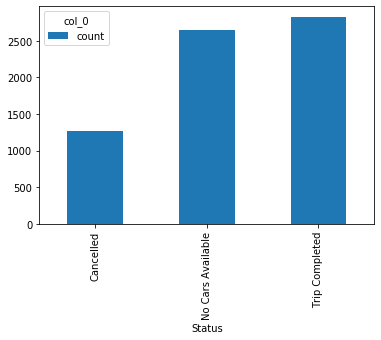

In [17]:
status = pd.crosstab(index = uberReq["Status"], columns="count")     
status.plot.bar()

Conclusion : No cars available is more than the number of trips cancelled.

In [20]:
#Identify the most problematic types of requests (city to
#airport / airport to city etc.) and the time slots (early mornings, late evenings etc.)
#using plots


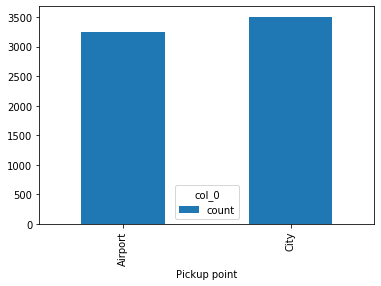

In [18]:
pick_point = pd.crosstab(index = uberReq["Pickup point"], columns="count")     
pick_point.plot.bar()

The pickup points Airport and City are almost equal times present in the dataset.

In [21]:
#grouping by Status and Pickup point.
uberReq.groupby(['Status', 'Pickup point']).size()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

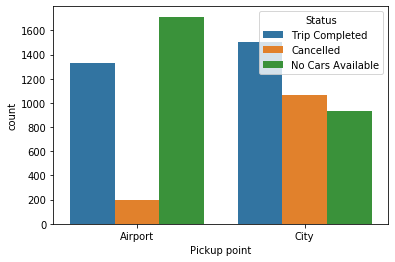

In [23]:
# Visualizing the count of Status and Pickup point
sns.countplot(x=uberReq['Pickup point'],hue =uberReq['Status'] ,data = uberReq)

There are more No cars available from Airport to City.
There are more cars Cancelled from City to Airport.

# 2. Find out the gap between supply and demand and show the same using plots.

a. Find the time slots when the highest gap exists

b. Find the types of requests (city-airport or airport-city) for which the gap is the
most severe in the identified time slots

In [27]:
#Request and Drop hours
uberReq['Request Hour'] = uberReq['Request timestamp'].dt.hour

In [28]:
#Time Slots
uberReq['Request Time Slot'] = 'Early Morning'
uberReq.loc[uberReq['Request Hour'].between(5,8, inclusive=True),'Request Time Slot'] = 'Morning'
uberReq.loc[uberReq['Request Hour'].between(9,12, inclusive=True),'Request Time Slot'] = 'Late Morning'
uberReq.loc[uberReq['Request Hour'].between(13,16, inclusive=True),'Request Time Slot'] = 'Noon'
uberReq.loc[uberReq['Request Hour'].between(17,21, inclusive=True),'Request Time Slot'] = 'Evening'
uberReq.loc[uberReq['Request Hour'].between(21,24, inclusive=True),'Request Time Slot'] = 'Night'

In [29]:
#As Demand can include trips completed, cancelled or no cars available, we will create a column with 1 as a value
uberReq['Demand'] = 1

In [30]:
#As Supply can only be the trips completed, rest all are excluded, so we will create a column with 1 as a supply value trips completed and 0 otherwise.
uberReq['Supply'] = 0
uberReq.loc[(uberReq['Status'] == 'Trip Completed'),'Supply'] = 1

In [31]:
#Demand Supply Gap can be defined as a difference between Demand and Supply
uberReq['Gap'] = uberReq['Demand'] - uberReq['Supply']
uberReq.loc[uberReq['Gap']==0,'Gap'] = 'Trip Completed'
uberReq.loc[uberReq['Gap']==1,'Gap'] = 'Trip Not Completed'

In [32]:
#Removing unnecessary columns
uberReq = uberReq.drop(['Request Hour', 'Demand', 'Supply'], axis=1)

In [33]:
uberReq

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,Request Time Slot,Gap
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Late Morning,Trip Completed
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Evening,Trip Completed
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Late Morning,Trip Completed
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Night,Trip Completed
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Morning,Trip Completed
...,...,...,...,...,...,...,...
6740,6745,City,No Cars Available,2016-07-15 23:49:03,NaT,Night,Trip Not Completed
6741,6752,Airport,No Cars Available,2016-07-15 23:50:05,NaT,Night,Trip Not Completed
6742,6751,City,No Cars Available,2016-07-15 23:52:06,NaT,Night,Trip Not Completed
6743,6754,City,No Cars Available,2016-07-15 23:54:39,NaT,Night,Trip Not Completed


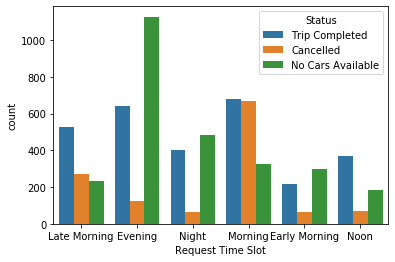

In [34]:
# Plot to find the count of the three requests, according to the defined time slots
sns.countplot(x=uberReq['Request Time Slot'],hue =uberReq['Status'] ,data = uberReq)

Most No Cars Available are in the Evening.

Most Cancelled trips are in the Morning.

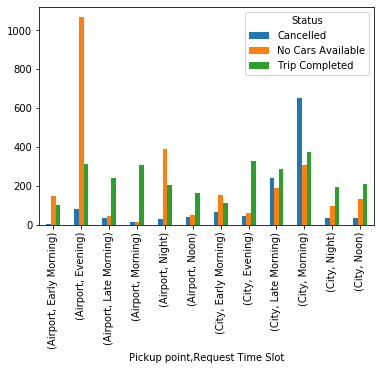

In [35]:
# Plot to find the count of the status, according to both pickup point and the time slot
pickup_df = pd.DataFrame(uberReq.groupby(['Pickup point','Request Time Slot', 'Status'])['Request id'].count().unstack(fill_value=0))
pickup_df.plot.bar()

Most No Cars Available are in the Evening from Airport to City.

Most Cancelled trips are in the Morning from City to Airport.

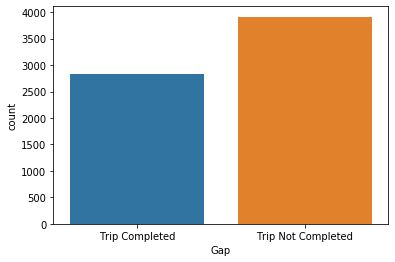

In [36]:
#Plot to count the number of requests that was completed and which was not
sns.countplot(x=uberReq['Gap'], data = uberReq)

More Trip not completed than Trip Completed.

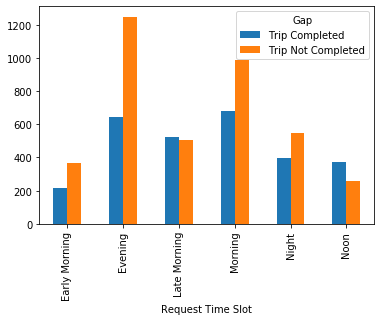

In [37]:
##Plot to count the number of requests that was completed and which was not, against the time slot
gap_timeslot_df = pd.DataFrame(uberReq.groupby(['Request Time Slot','Gap'])['Request id'].count().unstack(fill_value=0))
gap_timeslot_df.plot.bar()


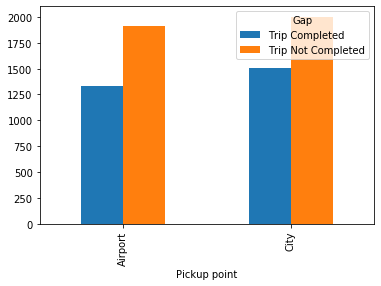

In [38]:
#Plot to count the number of requests that was completed and which was not, against pickup point
gap_pickup_df = pd.DataFrame(uberReq.groupby(['Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_pickup_df.plot.bar()

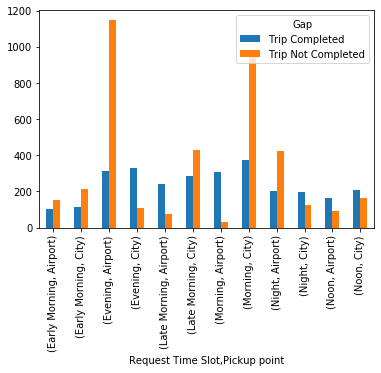

In [39]:
#Plot to count the number of requests that was completed and which was not, for the final analysis
gap_main_df = pd.DataFrame(uberReq.groupby(['Request Time Slot','Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_main_df.plot.bar()

# 3. What do you think is the reason for this issue for the supply-demand gap? Write the answer in less than 100 words. You may accompany the write-up with plot(s).

Pickup Point - City :
As per the analysis, the morning time slot is most problematic where the requests are being cancelled. Most probably the requests are being cancelled by the drivers due to the morning rush as it being the office hours and seeing the destination as airport which would be too far, the driver would think to earn more for the shorter trips within the city.

Pickup Point - Airport :
Upon analysis, the evening time slot seems to be most problematic for pickup points as airport where the requests being No Cars Available. The reason seems to be that not enough cars are available to service the requests as cars might not be available at the airport due to the cars serving inside the city.

# 4. Recommend some ways to resolve the supply-demand gap.


Based on the data analysis : -

For addressing early morning and morning 'Cancelled' rides
    * Penalty for driver cancelling Airport booking thrice a day
    * Provide incentive to drivers for Airport Rides / Airport Wait Duration
For addressing 'No Car Available' issue at Airport in evening and night
    * Airport Rides can be given weightage of 1.5 ride count
    * Exempt drivers with Airport Rides from daily minimum rides 
For addressing ‘No Car Available' issue in City during early morning and morning
    * Provide incentive to drivers for Airport Rides / Airport Wait Duration
    

For reducing the demand supply gap from airport to city, making a permanent stand in the airport to wait.


Last solution to bring down the gap is to increase the numbers of cab in its fleet.